# Example of a convolutional neural network for recognition of handwritten digits using the MNIST dataset

Based on https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Number: 3


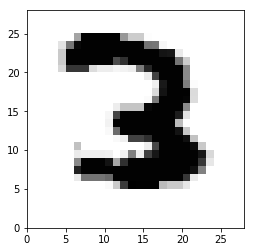

In [4]:
#randomly select a image ID
i = np.random.randint(0,x_train.shape[-1])

plt.imshow(x_train[i], cmap='Greys', interpolation='none', origin='lower', extent=[0, img_rows, 0, img_cols])

print('Number:', y_train[i])

### Prepare for input

In [5]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# convert class vectors to binary class matrices
print('Before',y_train[1])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('After',y_train[1])

Before 0
After [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


### Normalize

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Define the model

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

### Save the model

In [8]:
model_json = model.to_json()
with open("mnist_model.json", "w") as json_file:
    json_file.write(model_json)

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

### Compile the model

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### Train

In [11]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 50s 835us/step - loss: 0.2554 - acc: 0.9210 - val_loss: 0.0564 - val_acc: 0.9823
Epoch 2/12
60000/60000 [==============================] - 56s 933us/step - loss: 0.0839 - acc: 0.9751 - val_loss: 0.0387 - val_acc: 0.9875
Epoch 3/12
60000/60000 [==============================] - 60s 998us/step - loss: 0.0646 - acc: 0.9809 - val_loss: 0.0372 - val_acc: 0.9871
Epoch 4/12
60000/60000 [==============================] - 49s 815us/step - loss: 0.0545 - acc: 0.9836 - val_loss: 0.0312 - val_acc: 0.9893
Epoch 5/12
60000/60000 [==============================] - 55s 922us/step - loss: 0.0458 - acc: 0.9863 - val_loss: 0.0280 - val_acc: 0.9909
Epoch 6/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0412 - acc: 0.9878 - val_loss: 0.0263 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0368 - acc: 0.9888 - val_loss: 0.0292

### Save the weights

In [12]:
model.save_weights("mnist_model.h5")

### Test

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0248395759818
Test accuracy: 0.9923


In [14]:
pred_y = model.predict(x_test)

In [15]:
print(x_test.shape[0])

10000


Number: 4


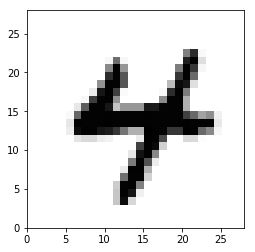

In [16]:
#randomly select a image ID
i = np.random.randint(0,x_test.shape[0])

plt.imshow(np.squeeze(x_test[i]), cmap='Greys', interpolation='none', extent=[0, img_rows, 0, img_cols])

print('Number:', np.argmax(pred_y[i]))